In [64]:
import pandas as pd

In [65]:
import matplotlib.pyplot as plt


QUE ES CADA COLUMNA, formato, y si esta presente en otro DF (con mismo o distinto nombre)

AUCTIONS
auction_type_id: todo NaN, DESCARTADA
country: todos mismo pais, DESCARTADA
date: fecha
device_id: ID del dispositivo. es equivalente a ref_hash de clicks e installs
platform: plataforma. tiene 2 valores posibles asi que debe ser ios y android
ref_type_id: ¿?  tiene MISMOS 2 valores posibles que platform
source_id:  5 valores posibles, ni idea que es
    

    
CLICKS
advertiser_id: 7 valores posibles. hay un unico que es la mayoria de las veces
action_id: todo NaN, DESCARTADA
source_id: 11 valores posibles. ni idea
created: fecha creacion
country_code: todos mismo pais, DESCARTADA
latitude: latitud
longitude: longitud 
wifi_connection: todos false. DESCARTADA
carrier_id: ni idea que es carrier. tiene varios valores posibles
trans_id: supongo que id de transaccion? son todos unicos
os_minor: ni idea,  varios valores posibles
agent_device: ???
os_major: 10 valores posibles, ni idea
specs_brand: 5 valores posibles. 2 con muchisima cantidad y 3 con re pocas veces. marca de algo?
brand: marca de algo?
timeToClick: ¿tiempo que tarda en clickear desde que aparece? en segundos
touchX:  ¿posicion de la pantalla en el eje horizontal?
touchY:  ¿posicion de la pantalla en el eje vertical?
ref_type: 4 valores posibles. ni idea
ref_hash: id del dispositivo. equivalente a device id de auctions y ref hash de installs
    
    
EVENTS
date: date
event_id: id del evento
ref_type:  apple_ifa o google_advertising_id. supongo que el que tiene mas cantidad es google
ref_hash: no se que es pero muchos valores se repiten. algunos mas de 2000 veces. varios individuales tamb
application_id: id de app supongo? la explicacion en el drive es rara
attributed: cuantas subastas gano jampp. booleano
device_countrycode: todos repetidos. descartar
device_os_version: version del sistema operativo? hay muchos y muchos repetidos
device_brand: marca del dispositivo? medio raro porque hay muchas marcas que tienen solo 1 registro
device_model: modelo del celular, varios repetidos
device_city: ciudad, varios repetidos
session_user_agent: hash de la sesion?
trans_id: inutil. Todos NaN
user_agent: 
event_uuid:
carrier: suponemos que es empresa de telefonia pero no tieen mucho sentid oa cantidad de valores posibles
kind:
device_os: sistema operativo del dispositivo
wifi: si estan con wifi o no
connection_type: si esta por cable o por antena de 4g
ip_address: ip? se puede agrupar. raro que algunos se repitan mucho
device_language: 
    

    
INSTALLS
created: -
application_id:
ref_type:
ref_hash:
click_hash:
attributed: todo nan ,inutil
implicit:
device_countrycode:
device_brand: marca del dispositivo
device_model: modelo del dispositivo
session_user_agent: user agent. La mayoria son http-kit. En general no es util
user_agent:
event_uuid:
kind:
wifi: true or false si esta con wifi o no
trans_id: inutil. Todos NaN
ip_address: 
device_language: hay 184 idiomas ?

In [66]:
auctions = pd.read_csv('auctions.csv')

In [67]:
clicks = pd.read_csv('clicks.csv')

In [68]:
events = pd.read_csv('events.csv')

/home/martinrosas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
installs = pd.read_csv('installs.csv')

In [70]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [71]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [72]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [73]:
events["connection_type"].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [74]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [75]:
# Un solo pais
auctions["country"].unique()

array([6333597102633388268])

In [76]:
# INUTIL
clicks['wifi_connection'].unique()

array([False])

In [77]:
# UTIL
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [78]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [79]:
list(installs.columns)

['created',
 'application_id',
 'ref_type',
 'ref_hash',
 'click_hash',
 'attributed',
 'implicit',
 'device_countrycode',
 'device_brand',
 'device_model',
 'session_user_agent',
 'user_agent',
 'event_uuid',
 'kind',
 'wifi',
 'trans_id',
 'ip_address',
 'device_language']

In [80]:
installs_columns = list(installs.columns)
installs_columns.remove("created")
for i in installs_columns:
    print(i," ",installs[i].value_counts())
    
# Importante en 

application_id   7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64
ref_type   1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64
ref_hash   5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
5376622639905210608    3
470581161921490835     3
2807966731127456435    3
394181128078904930     3
1332624341050561368    3
8209340170282049305    3
1826618012885478111    3
6207088909238189318    3
4603142710878547974    3
4587898421740190562    3
3429460795301152906    3
1838099903940931904    3
808602801225309575     3
2756309363004630634    3
5716316704073038128    3
1951826604052927528    3
570710

In [81]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [82]:
#solo 7 de los clicks coinciden en ref hash con installs. el resto de los installs no fueron nuestros

In [83]:
installs["ref_hash"].isin(clicks["ref_hash"]).value_counts()

False    3405
True        7
Name: ref_hash, dtype: int64

In [84]:
#miro las plataformas . varios tienen informacion del modelo de celular, version de android, etc

In [85]:
installs["user_agent"].value_counts().to_frame().iloc[50:100]

,user_agent
Dalvik/2.1.0 (Linux; U; Android 7.1.2; LM-X210 Build/N2G47H),6
Dalvik/2.1.0 (Linux; U; Android 7.1.2; Redmi 4X MIUI/V10.1.1.0.NAMMIFI),6
Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J610G Build/M1AJQ),6
Dalvik/2.1.0 (Linux; U; Android 7.0; Moto G (4) Build/NPJS25.93-14-18),6
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G955F Build/R16NW),6
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G950F Build/R16NW),5
Dalvik/2.1.0 (Linux; U; Android 6.0; CRO-L03 Build/HUAWEICRO-L03),5
Dalvik/2.1.0 (Linux; U; Android 9; motorola one Build/PPKS29.68-16-21-3),5
Dalvik/2.1.0 (Linux; U; Android 5.0.2; SM-G530BT Build/LRX22G),5
Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-A750G Build/R16NW),5


In [86]:
#android = android
#darwin = MAC OS

#creo columnas sobre sistema operativo 

In [87]:
import numpy as np

In [88]:
def is_android_or_macos(row):
    if row["user_agent"] is np.nan:
        return None
    agent = row["user_agent"].lower()
    if "android" in agent:
        return "android"
    elif "darwin" in agent:
        return "mac os"
    else:
        return "other"

In [89]:
installs["os"] = installs.apply(is_android_or_macos, axis=1)

In [90]:
installs["os"].value_counts()

android    957
mac os     772
Name: os, dtype: int64

In [91]:
#la mayoria de las instalaciones son con wifi

In [92]:
installs["wifi"].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [93]:
#agrego la marca del celular en caso de installs con android

In [94]:
android = installs[installs["os"] == "android"]

In [95]:
android.head()["user_agent"]

9     Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M B...
10    Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570...
11    Dalvik/2.1.0 (Linux; U; Android 6.0; MotoG3-TE...
12    Dalvik/2.1.0 (Linux; U; Android 8.1.0; Redmi 6...
13    Dalvik/2.1.0 (Linux; U; Android 5.1.1; SM-G531...
Name: user_agent, dtype: object

In [96]:
def brand_of_android_device(row):
    if row["user_agent"] is np.nan:
        return None
    agent = row["user_agent"].lower()
    if "sm-" in agent or "gt-" in agent:
        return "samsung"
    elif "lg-" in agent or "lm-" in agent:
        return "lg"
    elif "moto" in agent or "xt" in agent:
        return "motorola"
    elif "miui" in agent or " mi " in agent:
        return "xiaomi"
    elif "asus" in agent:
        return "asus"
    elif "lenovo" in agent:
        return "lenovo"
    elif  "huawei" in agent:
        return "huawei"
    elif "oneplus" in agent:
        return "oneplus"
    elif "positivo" in agent or "S455" in agent:
        return "positivo bgh"
    elif "zte" in agent:
        return "zte"
    elif "nokia" in agent:
        return "nokia"
    else:
        return "other"

In [97]:
android["brand"] = android.apply(brand_of_android_device, axis=1)

/home/martinrosas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
android["brand"].value_counts()

samsung         469
motorola        186
lg              115
xiaomi           68
other            41
huawei           36
asus             26
lenovo            7
zte               4
positivo bgh      3
oneplus           1
nokia             1
Name: brand, dtype: int64

In [99]:
#que carajo son los mac os? 

In [100]:
installs[installs["os"] == "mac os"]["user_agent"].apply(lambda x: x.split("/")[0]).value_counts()

MercadoPago    731
NextGen         20
HotelUrbano     13
PeixeUrbano      7
takealot         1
Name: user_agent, dtype: int64

In [101]:
#todos son http-kit/2.0

In [102]:
installs[installs["os"] == "mac os"][["user_agent", "session_user_agent"]].head()

,user_agent,session_user_agent
330,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
331,MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
332,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
333,MercadoPago/2.57.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0
334,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,http-kit/2.0


In [103]:
#cosas latitud y longitud
#los datos no dicen un carajo

In [104]:
lat = clicks.iloc[1]["latitude"]
lon = clicks.iloc[1]["longitude"]

In [105]:
from geopy.geocoders import Nominatim

In [106]:
"""geolocator = Nominatim()
geolocator.reverse('52.5094982,13.3765983')"""

"geolocator = Nominatim()\ngeolocator.reverse('52.5094982,13.3765983')"

In [107]:
"""latlon = str(lon)+", "+str(lat)
geolocator.reverse(latlon)"""

'latlon = str(lon)+", "+str(lat)\ngeolocator.reverse(latlon)'

In [108]:
#muchos eventos corresponden a un mismo click

In [109]:
events["ref_hash"].isin(clicks["ref_hash"]).value_counts()

False    2479078
True       15345
Name: ref_hash, dtype: int64

In [110]:
clicks["ref_hash"].isin(events["ref_hash"]).value_counts()

False    24571
True      1780
Name: ref_hash, dtype: int64

In [111]:
#me fijo si para algun hash de evento hay mas de un click

In [112]:

clicks[clicks["ref_hash"]==71063745129569882]

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
18848,3,NaN,0,2019-03-13T20:04:03.605Z,6333597102633388268,1.205689,1.070234,False,3.0,-10Ch0QIP5PydFNZPKmW9DTxP74WqHg,6.768137e+18,NaN,3.072849e+18,392184377613098015,2.0,67.893,0.134,0.708,1891515180541284343,71063745129569882
19198,3,NaN,0,2019-03-13T20:40:24.650Z,6333597102633388268,1.205689,1.070234,False,3.0,SF16Uq3tuApnZzQoM1deRCSOEujNpbw,6.768137e+18,NaN,3.072849e+18,392184377613098015,2.0,236.203,0.910,0.669,1891515180541284343,71063745129569882


In [113]:
events[events["ref_hash"] == 71063745129569882].head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
561534,2019-03-09 02:35:39.966,156,1891515180541284343,71063745129569882,63,False,6333597102633388268,NaN,3.812621e+18,6.914658e+18,...,NaN,7.418396e+18,7d595a5d-c44d-4b53-9676-8d202c946a88,NaN,7.320636e+18,NaN,True,NaN,7031349340731172603,6.977049e+18
582745,2019-03-09 02:06:41.012,31,1891515180541284343,71063745129569882,63,False,6333597102633388268,NaN,3.812621e+18,6.914658e+18,...,NaN,7.418396e+18,169dbe09-7474-43e9-8509-477aa7d552ce,NaN,8.820572e+18,NaN,True,NaN,7031349340731172603,6.977049e+18
679373,2019-03-09 02:16:17.441,156,1891515180541284343,71063745129569882,63,False,6333597102633388268,NaN,3.812621e+18,6.914658e+18,...,NaN,7.418396e+18,a580b40f-b985-4f85-842e-40ddb2f4edcc,NaN,7.320636e+18,NaN,True,NaN,7031349340731172603,6.977049e+18
1455060,2019-03-09 20:16:53.379,22,1891515180541284343,71063745129569882,66,False,6333597102633388268,NaN,3.812621e+18,6.914658e+18,...,NaN,7.418396e+18,1f436dcf-5efa-4f2c-9d5b-bef5f42db849,NaN,5.500848e+18,NaN,False,NaN,7186198963418033045,6.977049e+18
1828108,2019-03-11 18:08:01.720,441,1891515180541284343,71063745129569882,182,False,6333597102633388268,4.967033e+18,NaN,NaN,...,NaN,NaN,a7775027-43d8-4497-b79b-b55d8f511af8,NaN,3.003428e+18,2.748831e+18,NaN,NaN,8459324374504917851,NaN


In [114]:
#junto por ref hash, me quedo solo con los hashes que aparecen en ambos dataset

In [115]:
events_clicks = events.merge(clicks,on="ref_hash", how="inner")

In [116]:
#agrupo por ref hash , cuento y agarro alguna columna cualquiera para ver cuantos eventos tengo por click

In [117]:
counted_events_by_click = events_clicks.groupby("ref_hash").count()["attributed"]

In [118]:
#algunos clicks tienen muchos eventos

In [119]:
counted_events_by_click.head(10)

ref_hash
4467013148049275      1
6251876360487092      4
16228483706113027     1
37004804375929554     2
38415420842513232     3
56820982416916093    12
71063745129569882    26
74885721366447582     1
75699248537913178     1
80994729690281632     4
Name: attributed, dtype: int64

In [120]:
comparing = events_clicks[["ref_hash","date","created"]]

In [121]:
comparing.head()

,ref_hash,date,created
0,8187571300120427764,2019-03-08 22:13:08.838,2019-03-09T01:05:04.020Z
1,8187571300120427764,2019-03-09 19:13:00.431,2019-03-09T01:05:04.020Z
2,8187571300120427764,2019-03-09 19:12:58.551,2019-03-09T01:05:04.020Z
3,8187571300120427764,2019-03-09 19:13:01.768,2019-03-09T01:05:04.020Z
4,8187571300120427764,2019-03-09 19:12:56.266,2019-03-09T01:05:04.020Z


In [122]:
#mirando el caso de 8187571300120427764
#para un mismo click hay distintos eventos
#lo que no encuentro sentido es que los eventos son todos anteriores al click.
#incluso asumiendo que created esta en utc y lo convertimos a gmt -3, casi todos los eventos igual serian
#anteriores excepto por el dei ndice 0. el cua seria 5 minutos despues

In [123]:
comparing[comparing["ref_hash"] == 8187571300120427764]

,ref_hash,date,created
0,8187571300120427764,2019-03-08 22:13:08.838,2019-03-09T01:05:04.020Z
1,8187571300120427764,2019-03-09 19:13:00.431,2019-03-09T01:05:04.020Z
2,8187571300120427764,2019-03-09 19:12:58.551,2019-03-09T01:05:04.020Z
3,8187571300120427764,2019-03-09 19:13:01.768,2019-03-09T01:05:04.020Z
4,8187571300120427764,2019-03-09 19:12:56.266,2019-03-09T01:05:04.020Z
5,8187571300120427764,2019-03-06 16:53:26.252,2019-03-09T01:05:04.020Z
6,8187571300120427764,2019-03-06 16:53:21.613,2019-03-09T01:05:04.020Z
7,8187571300120427764,2019-03-06 16:53:24.616,2019-03-09T01:05:04.020Z
8,8187571300120427764,2019-03-06 10:27:44.857,2019-03-09T01:05:04.020Z


In [124]:
#miro si tengo para ese ref hash infomacion en auctions (el feature equivalente es device_id)

In [125]:
auctions[auctions["device_id"] == 8187571300120427764]

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
1197094,NaN,6333597102633388268,2019-03-10 01:55:04.006005,8187571300120427764,1,1,0
1625992,NaN,6333597102633388268,2019-03-06 01:13:13.245062,8187571300120427764,1,1,0
1627026,NaN,6333597102633388268,2019-03-06 01:21:53.011565,8187571300120427764,1,1,0
3134224,NaN,6333597102633388268,2019-03-13 11:24:37.668349,8187571300120427764,1,1,0
4908850,NaN,6333597102633388268,2019-03-08 15:48:51.767735,8187571300120427764,1,1,0
5720563,NaN,6333597102633388268,2019-03-06 10:32:11.672472,8187571300120427764,1,1,0
6127571,NaN,6333597102633388268,2019-03-07 15:33:26.836474,8187571300120427764,1,1,0
6130428,NaN,6333597102633388268,2019-03-07 15:34:10.393918,8187571300120427764,1,1,0
6206269,NaN,6333597102633388268,2019-03-09 01:16:14.532874,8187571300120427764,1,1,0
6207847,NaN,6333597102633388268,2019-03-09 01:15:26.552792,8187571300120427764,1,1,0


In [126]:
# Clicks

In [127]:
clicks['range'] = pd.to_datetime(clicks['created']).dt.floor('60T').dt.time

In [128]:
clicksIn60Min = clicks.groupby(["range"])["range"].count()

In [129]:
clicksIn60Min

range
00:00:00     440
01:00:00    4209
02:00:00    2327
03:00:00     754
04:00:00    1079
05:00:00     945
06:00:00     678
07:00:00     518
08:00:00     537
09:00:00     754
10:00:00    1143
11:00:00    1455
12:00:00    1199
13:00:00     926
14:00:00     834
15:00:00     959
16:00:00     966
17:00:00     641
18:00:00     655
19:00:00     380
20:00:00     389
21:00:00     451
22:00:00    1386
23:00:00    2726
Name: range, dtype: int64

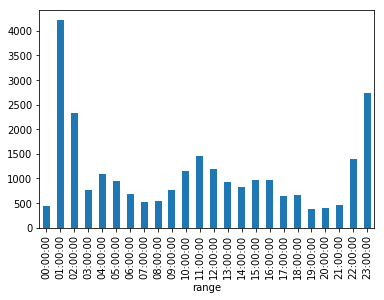

In [130]:
clicksIn60Min.plot.bar()